<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***


<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-10 04:38:12--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-10 04:38:13 (62.5 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [ ]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

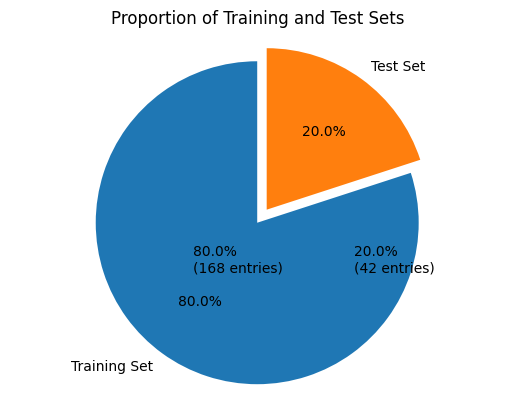

In [ ]:
# 1.1
# Split the data into X and Y
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data.drop('Type', axis=1)  # Features
y = data['Type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify = y)

train_proportion = len(X_train) / len(data)
test_proportion = len(X_test) / len(data)

labels = ['Training Set', 'Test Set']
sizes = [train_proportion, test_proportion]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Training and Test Sets')
plt.axis('equal')

plt.annotate(f'{train_proportion*100:.1f}%\n({len(X_train)} entries)', xy=(-0.4, 0), xytext=(-0.4, -0.3))
plt.annotate(f'{test_proportion*100:.1f}%\n({len(X_test)} entries)', xy=(0.6, 0), xytext=(0.6, -0.3))

plt.show()

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


In [ ]:
import pandas as pd

X = data.drop('Type', axis=1)
std_deviation = X.std()

print("Standard Deviation of Features:")
print(std_deviation)


Standard Deviation of Features:
Area                       2.909699
Perimeter                  1.305959
Compactness                0.023629
Length of Kernel           0.443063
Width of Kernel            0.377714
Asymmetry Coefficient      1.503557
Length of Kernel Groove    0.491480
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "Normalizer": Normalizer()
}

results = {}

for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = LogisticRegression(random_state=42)

    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[scaler_name] = {"Accuracy": accuracy, "F1 Score": f1}

results_df = pd.DataFrame.from_dict(results, orient='index')

print(results_df)


                Accuracy  F1 Score
StandardScaler  0.880952  0.873056
RobustScaler    0.880952  0.873056
MinMaxScaler    0.904762  0.900000
Normalizer      0.833333  0.829094


<font color='Green'><b>Answer:</b></font>

- **1.2** I have chosen the ***MinMaxScaler*** because it has the highest score in terms of accuracy and F1 Score. MinMaxScaler is used when there the standard deviation is not small in the sets. Since there is a large SD value from most of the features like area, permieter, width, and asymettry, reveals that there is a large difference between each of the datasets. This indicates that it is not a straight linear relationship but more so one with a lot of things to consider. Hence the use of MinMaxScaler as it will maintain the originial distrubution and wont change the distance between the points. It ensures that all features are on a similar scale, preventing certain features from dominating the others during training, and it's robust to the potential presence of outliers in the data.


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [ ]:
# 1.3
# Add necessary code here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

rf_predictions = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

svc_predictions = svc_classifier.predict(X_test_scaled)

svc_accuracy = accuracy_score(y_test, svc_predictions)
print("Support Vector Classifier Accuracy:", svc_accuracy)

rf_precision = precision_score(y_test, rf_predictions, average = "micro")
rf_recall = recall_score(y_test, rf_predictions, average = "micro")
rf_f1_score = f1_score(y_test, rf_predictions, average = "micro")

print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)
print("Random Forest Classifier F1 Score:", rf_f1_score)

svc_precision = precision_score(y_test, svc_predictions, average = "micro")
svc_recall = recall_score(y_test, svc_predictions, average = "micro")
svc_f1_score = f1_score(y_test, svc_predictions, average = "micro")

print("Support Vector Classifier Precision:", svc_precision)
print("Support Vector Classifier Recall:", svc_recall)
print("Support Vector Classifier F1 Score:", svc_f1_score)

rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classifier Confusion Matrix:\n", rf_conf_matrix)

svc_conf_matrix = confusion_matrix(y_test, svc_predictions)
print("Support Vector Classifier Confusion Matrix:\n", svc_conf_matrix)

unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)



Random Forest Classifier Accuracy: 0.9047619047619048
Support Vector Classifier Accuracy: 0.9047619047619048
Random Forest Classifier Precision: 0.9047619047619048
Random Forest Classifier Recall: 0.9047619047619048
Random Forest Classifier F1 Score: 0.9047619047619048
Support Vector Classifier Precision: 0.9047619047619048
Support Vector Classifier Recall: 0.9047619047619048
Support Vector Classifier F1 Score: 0.9047619047619048
Random Forest Classifier Confusion Matrix:
 [[10  1  3]
 [ 0 14  0]
 [ 0  0 14]]
Support Vector Classifier Confusion Matrix:
 [[10  2  2]
 [ 0 14  0]
 [ 0  0 14]]


<font color='Green'><b>Answer:</b></font>

**1.3**

***Looking at the numbers***

I was contemplating between random forest and SVC due to the complex nature of the dataset. I wanted to use neural networks but I found that the dataset was not that complicated for the method. Based off of the accuracy, percision, recall, f1 score, and confusion matrixes random forest would be best for accuracy and robustnessto noise - however, SVC would be better for dealing with complex boundary decisions.

Suprisingly the accuracy, preciosn, recall, and f1 score are all the same values, which leaves us to look at the confusion matrix. The SVC has fewer false postive than the Random forest which can show that it is better at minimixing negative instances. Despite random forest also having a more accurate prediction in false negatives, I feel when it comes to classifying objects it is better to have less false positive than negatives.

Both classifiers exhibit robustness to noise and outliers, as indicated by the absence of false predictions in the third class. However, SVC shows a slightly better performance in terms of handling false predictions in the second class, which may indicate better generalization and robustness.

***Looking at the data***

A major disadvantage of SVC is that it can be costly, especially when it comes to large datasets - thankfully the one that we have is not that big of a dataset so we dont have to worry about this. The dataset exhibits non-linear relationships between features and the target variable, and the class distribution is reasonably balanced hence SVC is our best option.

**NOW WE WILL CHOOSE THE BEST SVC KERNEL FOR OUR DATA**

In [ ]:
# Support Vector Classifier with different kernel functions
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train_scaled, y_train)
    svc_predictions = svc_classifier.predict(X_test_scaled)
    svc_accuracy = accuracy_score(y_test, svc_predictions)

    svc_precision = precision_score(y_test, svc_predictions, average='micro')
    svc_recall = recall_score(y_test, svc_predictions, average='micro')
    svc_f1 = f1_score(y_test, svc_predictions, average='micro')

    svc_conf_matrix = confusion_matrix(y_test, svc_predictions)

    print(f"\nSupport Vector Classifier (Kernel: {kernel})")
    print("Accuracy:", svc_accuracy)
    print("Precision:", svc_precision)
    print("Recall:", svc_recall)
    print("F1 Score:", svc_f1)
    print("Confusion Matrix:\n", svc_conf_matrix)



Support Vector Classifier (Kernel: linear)
Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048
Confusion Matrix:
 [[10  2  2]
 [ 0 14  0]
 [ 0  0 14]]

Support Vector Classifier (Kernel: poly)
Accuracy: 0.8333333333333334
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334
Confusion Matrix:
 [[ 9  2  3]
 [ 2 12  0]
 [ 0  0 14]]

Support Vector Classifier (Kernel: rbf)
Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.9047619047619048
Confusion Matrix:
 [[10  2  2]
 [ 0 14  0]
 [ 0  0 14]]

Support Vector Classifier (Kernel: sigmoid)
Accuracy: 0.047619047619047616
Precision: 0.047619047619047616
Recall: 0.047619047619047616
F1 Score: 0.047619047619047616
Confusion Matrix:
 [[ 0 11  3]
 [ 0  1 13]
 [ 0 13  1]]


Based off of the values above the best choice is the linear kernel as it produces the best results. Even though rbf produces the same score, linear is easier to intepret and work around.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(kernel='linear'))
])

param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__class_weight': [None, 'balanced'],
    'svc__tol': [1e-3, 1e-4, 1e-5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


      Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
178  11.48      13.05       0.8473             5.180            2.758   
62   12.36      13.19       0.8923             5.076            3.042   
54   14.52      14.60       0.8557             5.741            3.113   
164  11.14      12.79       0.8558             5.011            2.794   
207  13.20      13.66       0.8883             5.236            3.232   
..     ...        ...          ...               ...              ...   
163  12.55      13.57       0.8558             5.333            2.968   
209  12.30      13.34       0.8684             5.243            2.974   
82   20.20      16.89       0.8894             6.285            3.864   
184  12.89      13.77       0.8541             5.495            3.026   
169  11.24      13.00       0.8359             5.090            2.715   

     Asymmetry Coefficient  Length of Kernel Groove  
178                  5.876                    5.002  
62             

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE dimensionality reduction to the seeds dataset
X_eda = X.copy(deep=True)
y_eda = y.copy(deep=True)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_eda)

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_eda, test_size=0.2, random_state=42)


grid_search_tsne = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tsne.fit(X_train_tsne, y_train_tsne)

best_params_tsne = grid_search_tsne.best_params_
best_score_tsne = grid_search_tsne.best_score_

print("Best Parameters (t-SNE):", best_params_tsne)
print("Best Score (t-SNE):", best_score_tsne)


Best Parameters (t-SNE): {'svc__C': 10, 'svc__class_weight': None, 'svc__tol': 0.001}
Best Score (t-SNE): 0.905169340463458


<font color='Green'><b>Answer:</b></font>

**1.5**

I decided to go with the t-SNE as t-SNE is better suited for non-linear data, as it can maintain the complexity and reveal local structures and patterns in the data. Since the data set is small it shouldnt be an issue when it comes to computational power.

COMPARE THE MODELS PERFORMACE

In terms of the C value, the t-SNE preforms better as it requires less regularization. This means that it captures more important patterns now that it has reducded the complexity in the set. Before, when there was no reduction the C value was much higher as it captured more complex trends in the data. In terms of the accuracy, t-SNE preforms a bit less than without. This is because we removed some data that may have influnced a more accurate decision on the dataset - yet this dosent mean that it well work best with newer testing sets.


### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

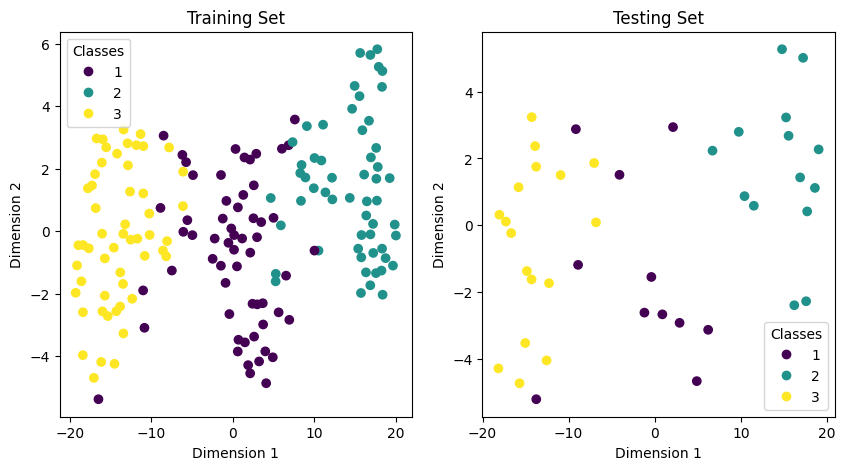

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

unique_labels_train = set(y_train)
unique_labels_test = set(y_test)

scatter_train = ax1.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_tsne, cmap='viridis')
ax1.set_title('Training Set')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
legend_train = ax1.legend(handles=scatter_train.legend_elements()[0], labels=unique_labels_train, title='Classes')

scatter_test = ax2.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test_tsne, cmap='viridis')
ax2.set_title('Testing Set')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
legend_test = ax2.legend(handles=scatter_test.legend_elements()[0], labels=unique_labels_test, title='Classes')

plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

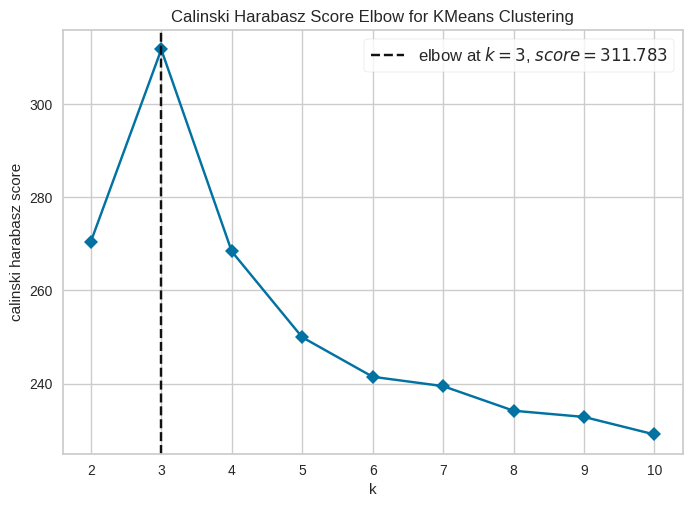

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Include a scaler in the pipeline
    ('kmeans', KMeans())  # Include K-Means clustering algorithm
])

param_grid = {
    'kmeans__n_clusters': range(2, 11)
}

visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], metric='calinski_harabasz', timings=False)

visualizer.fit(X_train)
visualizer.show()


<font color='Green'><b>Answer:</b></font>

- **2.1** The elbow method helps us decide how many clusters we should use. It looks at the distance and the centroid of the cluster. It drops towards zero the more we clusters that we get, the elbow is the optimal number of clusters where the score is starts to drop. Ideally we want the one with the highest score which is k = 3.

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [ ]:
pipeline.fit(X_train)
optimal_k = visualizer.elbow_value_
pipeline.named_steps['kmeans'].set_params(n_clusters=optimal_k)
train_labels = pipeline.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

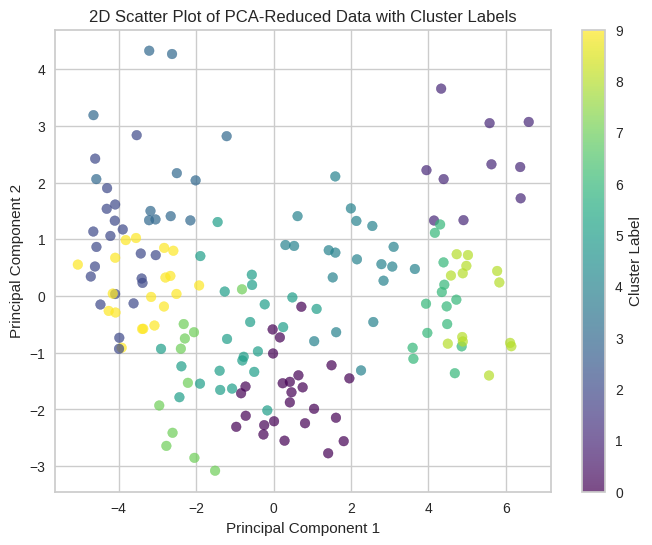

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA-Reduced Data with Cluster Labels')

plt.colorbar(label='Cluster Label')

plt.grid(True)
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

This suggests that the data points belonging to Cluster 1 (or 2) tend to have similar values along the second principal component.  

Cluster 0 (or 1) doesn't exhibit strong correlations with either of the principal components. Instead, the data points in this cluster are spread out across both dimensions, indicating that they don't conform to any clear pattern along the first or second principal component.

Cluster 2 (or 3) show a mixture of characteristics from Clusters 1 and 2 in the PCA space. However, they tend to align more closely with the characteristics of Cluster 2, particularly along the second principal component.

